# 02 - Data Cleaning

This notebook cleans the Walmart sales snapshot by handling missing values, fixing data types, and preparing the dataset for feature engineering.


In [1]:
import os
import pandas as pd

cwd = os.getcwd()
base_path = os.path.abspath(os.path.join(cwd, "..")) if cwd.endswith("notebooks") else cwd
snapshot_path = os.path.join(base_path, "data", "processed", "walmart_snapshot.csv")

df = pd.read_csv(snapshot_path)
df.head()


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,NaN,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,NaN,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()


In [11]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 2565 entries, 0 to 6432
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         2565 non-null   int64  
 1   date          2565 non-null   object 
 2   weekly_sales  2565 non-null   float64
 3   holiday_flag  2565 non-null   int64  
 4   temperature   2565 non-null   float64
 5   fuel_price    2565 non-null   float64
 6   cpi           2565 non-null   float64
 7   unemployment  2565 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 180.4+ KB


store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [12]:
# Fill missing Weekly_Sales with median
df['weekly_sales'] = df['weekly_sales'].fillna(df['weekly_sales'].median())


# Drop rows with missing Store or Date (if any)
df.dropna(subset=['store', 'date'], inplace=True)


## Step 5: Fix Data Types

We ensure that the `date` column is properly converted to datetime format, and `store` is treated as a string for consistency.


In [14]:
df['date'] = pd.to_datetime(df['date'])
df['store'] = df['store'].astype(str)


## Step 6: Outlier Detection

We visualize the distribution of `weekly_sales` to identify potential outliers using a boxplot.


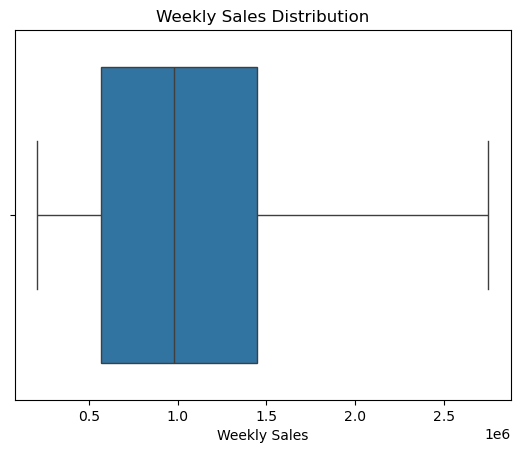

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['weekly_sales'])
plt.title("Weekly Sales Distribution")
plt.xlabel("Weekly Sales")
plt.show()


## Step 7: Save Cleaned Data

We save the cleaned dataset to the `data/processed` directory for use in the next stage of the pipeline.


In [16]:
cleaned_path = os.path.join(base_path, "data", "processed", "walmart_cleaned.csv")
df.to_csv(cleaned_path, index=False)


## Summary

- Filled missing values in `weekly_sales` using the median
- Converted `date` to datetime format
- Cast `store` to string type
- Visualized outliers in `weekly_sales`
- Saved cleaned dataset to `data/processed/walmart_cleaned.csv`
